In [2]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
hist = pd.read_csv("BTC-USD.csv")
hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-23,2808.100098,2832.179932,2653.939941,2730.399902,2730.399902,1072840000
1,2017-07-24,2732.699951,2777.260010,2699.189941,2754.860107,2754.860107,866473984
2,2017-07-25,2757.500000,2768.080078,2480.959961,2576.479980,2576.479980,1460089984
3,2017-07-26,2577.770020,2610.760010,2450.800049,2529.449951,2529.449951,937404032
4,2017-07-27,2538.709961,2693.320068,2529.340088,2671.780029,2671.780029,789104000


In [4]:
hist = hist[['Close']]
hist.head()

,Close
0,2730.399902
1,2754.860107
2,2576.479980
3,2529.449951
4,2671.780029


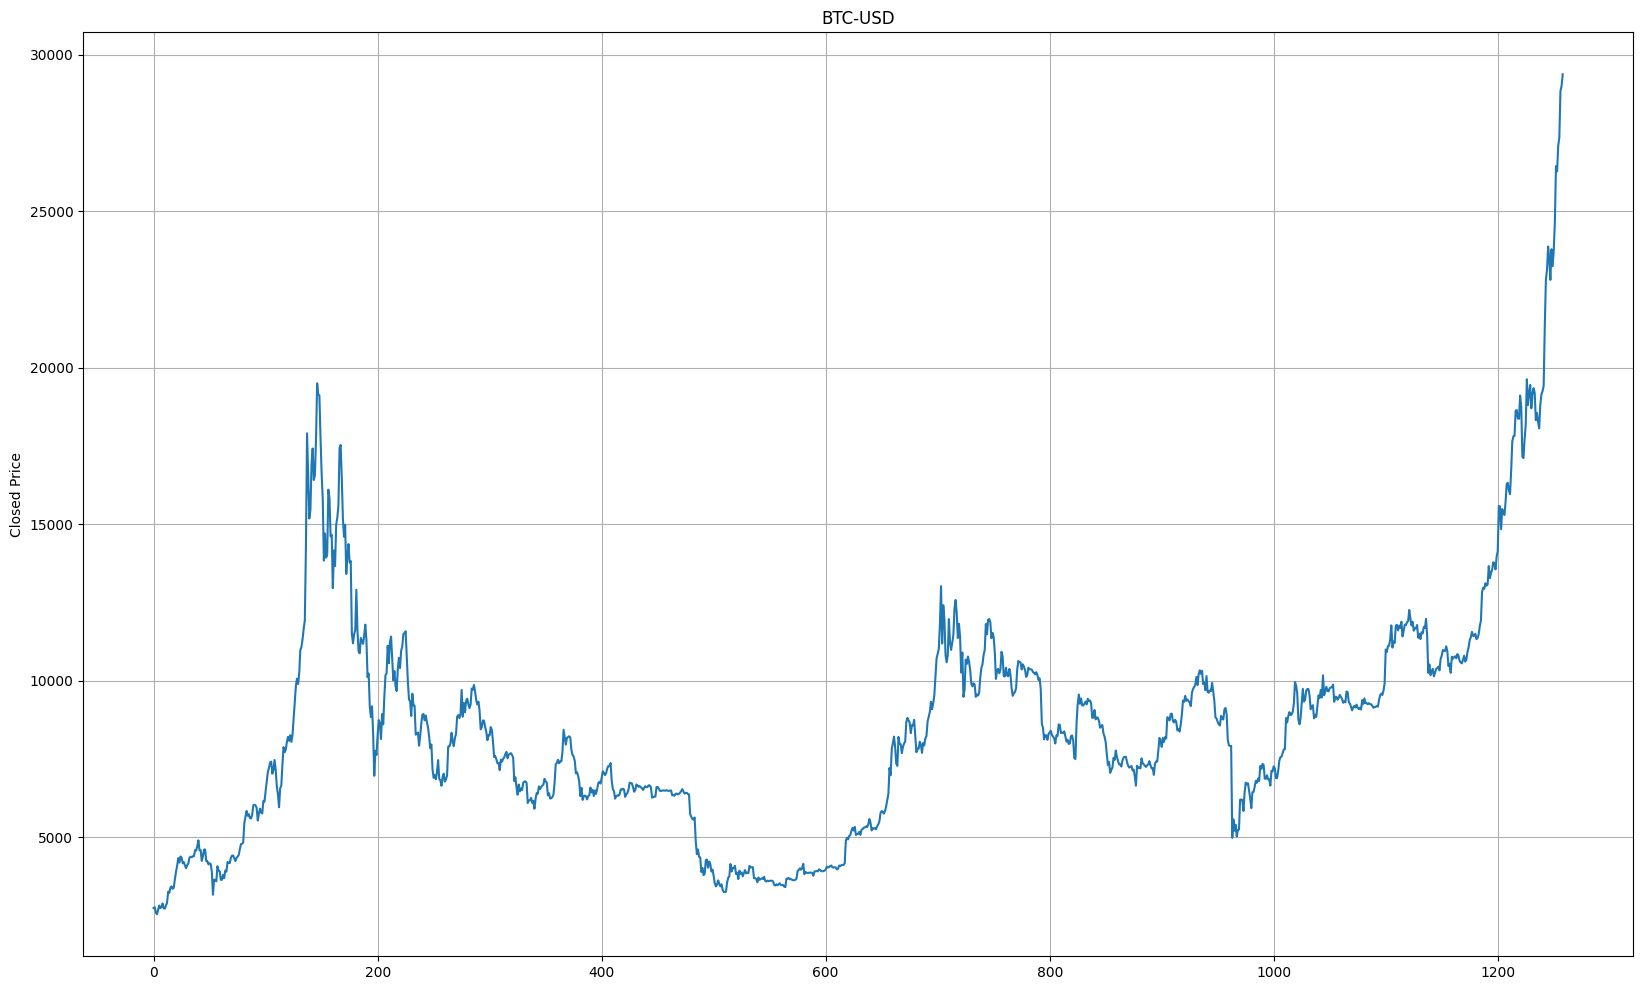

In [5]:
hist['Close'].plot(title="BTC-USD", ylabel="Closed Price", figsize=[20, 12])
plt.grid()

In [6]:
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]

mean = np.mean(change)
std_dev = np.std(change)
print('\nAverage Percentage Change: ' + str(round(mean*100, 2)) + '%')
print('Percentage Change Standart Deviation: ' + str(round(std_dev*100, 2)) + '%')


Average Percentage Change: 0.28%
Percentage Change Standart Deviation: 4.16%


In [7]:
start_date = '2021-08-17'
end_date = '2022-08-17'

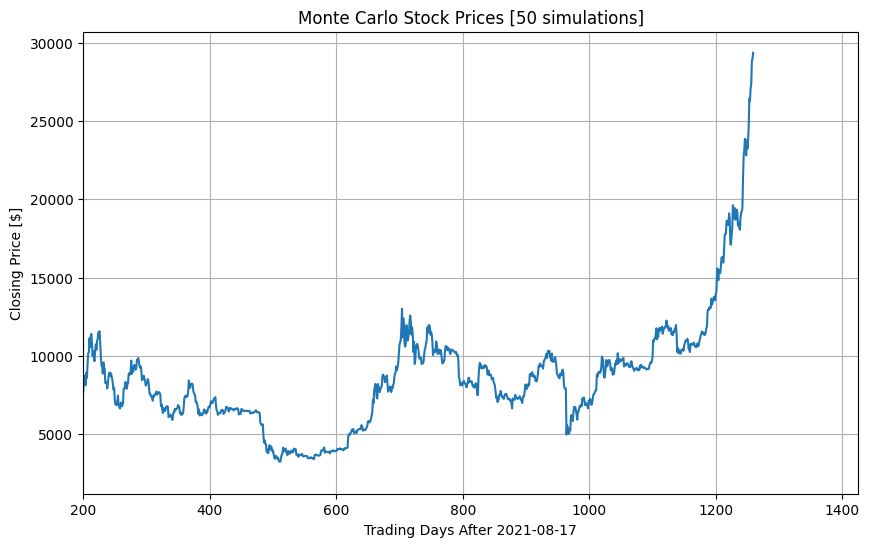

In [8]:
# Simülasyon Numbers and Prediction period
simulations = 50 # make 200 prediction, much simulation sense a good results
days_to_sim = 1*166 # process numbers for one year

fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([200, len(days)+days_to_sim])
plt.grid()

close_end = []
above_close = []

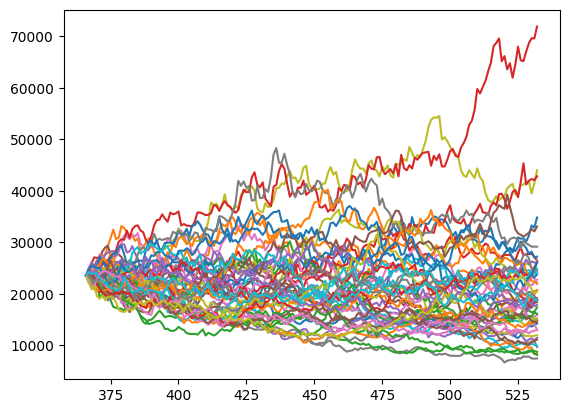

In [8]:
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]

    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [9]:
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPrediction for BTC close price after 1 year =  '  + ' ' + str(round(average_closing_price, 2)))
print('Expected percentage change after 1 year: ' + str(round(average_perc_change*100, 2)) + '%')
print('Probability of increasing percentage to BTC-USD for after one year : ' + str(round(probability_of_increase*100, 2)) + '%')


Prediction for BTC close price after 1 year =   20785.01
Expected percentage change after 1 year: -11.68%
Probability of increasing percentage to BTC-USD for after one year : 32.0%
